In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import ensemble_model.preprocesser as preprocesser 
import ensemble_model.MoE_model as moe 
from torch.utils.data import Dataset, DataLoader
from transformers import BertModel, BertTokenizer, RobertaModel, RobertaTokenizer
import whatthepatch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve

/usr/local/lib/python3.11/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# df = pd.read_json(r'./datasets/patch_db.json', encoding='utf_8_sig')
# df.dropna(inplace=True)
# label2id={'non-security':0,'security':1}
# df = df.replace({"category": label2id})
# df

In [3]:

# df = pd.read_csv(r'/root/autodl-tmp/ensemble-commit/dataset/dataset.csv', index_col=0, encoding='utf_8_sig')
# df.fillna('', inplace=True)
# label2id={'negative':0,'positive':1}
# df = df.replace({"label": label2id})
# df



In [4]:
# def find_longest_list(lists):
#     # print(lists)
#     if not lists:
#         return None
#     try:
#         longest_list = max(lists, key=len)
#     except:
#         longest_list = None
#     return longest_list

In [5]:
# def extract_lines(changes):
#     try:
#        res = ''.join([x.line for x in changes])
#     except:
#        res = None
#     return res

In [6]:
# df['command'] = df['diff'].apply(lambda x : extract_lines(find_longest_list([y.changes for y in whatthepatch.parse_patch(x)])))
# extracted_cols = df['diff'].str.extract(r'^diff --git (?P<source>[^\t\n]+) (?P<target>[^\t\n]+)')
# whatthepatch.apply_diff(diff, lao)

In [7]:
# len(df_dataset)

In [8]:
# df_dataset[0]

In [9]:
# Load BERT and CodeBERT models and tokenizers
bert_model = BertModel.from_pretrained('./models/bert-base-cased')
bert_tokenizer = BertTokenizer.from_pretrained('./models/bert-base-cased')

codebert_model = RobertaModel.from_pretrained('./models/codebert-base')
codebert_tokenizer = RobertaTokenizer.from_pretrained('./models/codebert-base')

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [2]:
# train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)
# test_data, val_data = train_test_split(test_data, test_size=0.5, random_state=42)
train_data = pd.read_csv('./datasets/PD_train.csv')
test_data = pd.read_csv('./datasets/PD_test.csv')
val_data = pd.read_csv('./datasets/PD_val.csv')

train_data.reset_index(inplace=True)
test_data.reset_index(inplace=True)
val_data.reset_index(inplace=True)

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
  0%|          | 0/10 [00:00<?, ?it/s]

=============================train========================
Epoch 1/10, Loss: 0.26939012446611926
=============================eval========================


 10%|█         | 1/10 [10:55<1:38:20, 655.58s/it]

Validation Accuracy: 0.9315093988460823
Precision: 0.9312004249561711
Recall: 0.9315093988460823
F1-Score: 0.9309047102164916
Epoch 1/10, Validation Accuracy: 0.9315093988460823
当前best acc 0.9315093988460823
=============================train========================
Epoch 2/10, Loss: 0.18283545726752884
=============================eval========================


 20%|██        | 2/10 [21:43<1:26:46, 650.87s/it]

Validation Accuracy: 0.931323283082077
Precision: 0.9309664670271236
Recall: 0.931323283082077
F1-Score: 0.9307815442529255
Epoch 2/10, Validation Accuracy: 0.931323283082077
比best acc差记一次 0
=============================train========================
Epoch 3/10, Loss: 0.12215878180414164
=============================eval========================


 30%|███       | 3/10 [32:31<1:15:47, 649.64s/it]

Validation Accuracy: 0.9292760096780197
Precision: 0.9293416136190862
Recall: 0.9292760096780197
F1-Score: 0.9293075201577919
Epoch 3/10, Validation Accuracy: 0.9292760096780197
比best acc差记一次 1
=============================train========================
Epoch 4/10, Loss: 0.0749899922107791
=============================eval========================


 40%|████      | 4/10 [43:18<1:04:51, 648.60s/it]

Validation Accuracy: 0.9322538619021031
Precision: 0.931873447558614
Recall: 0.9322538619021031
F1-Score: 0.9318274412927328
Epoch 4/10, Validation Accuracy: 0.9322538619021031
当前best acc 0.9322538619021031
=============================train========================
Epoch 5/10, Loss: 0.049224464017682955
=============================eval========================


 50%|█████     | 5/10 [54:05<54:01, 648.22s/it]  

Validation Accuracy: 0.9302065884980458
Precision: 0.9300999799786899
Recall: 0.9302065884980458
F1-Score: 0.9301489179117178
Epoch 5/10, Validation Accuracy: 0.9302065884980458
比best acc差记一次 0
=============================train========================
Epoch 6/10, Loss: 0.0377734800472339
=============================eval========================


 60%|██████    | 6/10 [1:04:53<43:12, 648.04s/it]

Validation Accuracy: 0.9309510515540667
Precision: 0.9307208158148669
Recall: 0.9309510515540667
F1-Score: 0.9308094840956719
Epoch 6/10, Validation Accuracy: 0.9309510515540667
比best acc差记一次 1
=============================train========================
Epoch 7/10, Loss: 0.027857152790825287
=============================eval========================


 70%|███████   | 7/10 [1:15:41<32:24, 648.10s/it]

Validation Accuracy: 0.9367206402382282
Precision: 0.936428310692937
Recall: 0.9367206402382282
F1-Score: 0.9362589205840929
Epoch 7/10, Validation Accuracy: 0.9367206402382282
当前best acc 0.9367206402382282
=============================train========================
Epoch 8/10, Loss: 0.02671189666092984
=============================eval========================


 80%|████████  | 8/10 [1:26:29<21:36, 648.06s/it]

Validation Accuracy: 0.932998324958124
Precision: 0.93326590826698
Recall: 0.932998324958124
F1-Score: 0.9320597726298754
Epoch 8/10, Validation Accuracy: 0.932998324958124
比best acc差记一次 0
=============================train========================
Epoch 9/10, Loss: 0.022950562700069697
=============================eval========================


 90%|█████████ | 9/10 [1:37:16<10:47, 647.79s/it]

Validation Accuracy: 0.9287176623860041
Precision: 0.9287070973213822
Recall: 0.9287176623860041
F1-Score: 0.9287123439406152
Epoch 9/10, Validation Accuracy: 0.9287176623860041
比best acc差记一次 1
=============================train========================
Epoch 10/10, Loss: 0.02047407213327819
=============================eval========================


 90%|█████████ | 9/10 [1:48:04<12:00, 720.48s/it]

Validation Accuracy: 0.9268565047459519
Precision: 0.927683770564737
Recall: 0.9268565047459519
F1-Score: 0.927155467501731
Epoch 10/10, Validation Accuracy: 0.9268565047459519
比best acc差记一次 2
Early stopping
best acc是 0.9367206402382282


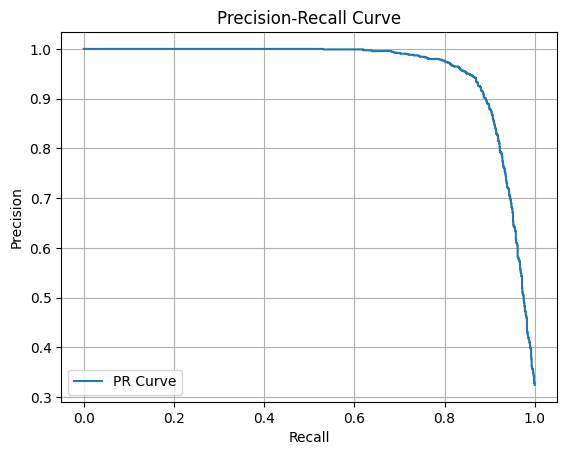

embedding来啦 (768,)


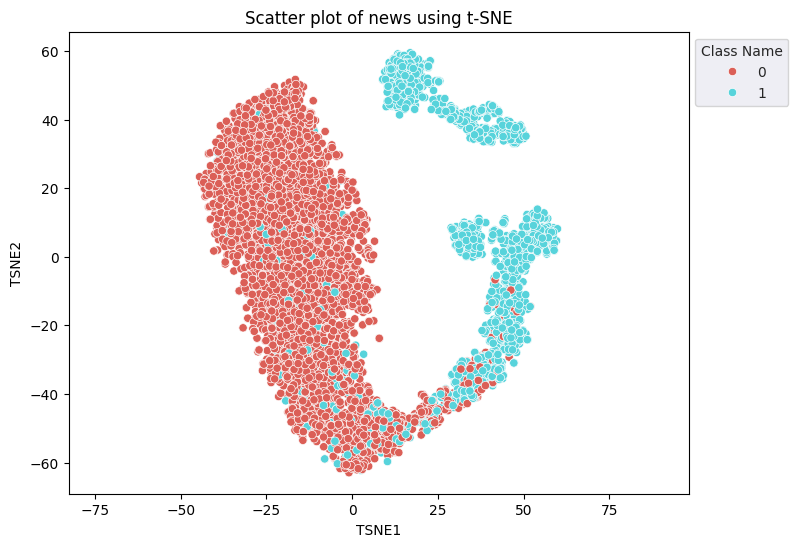

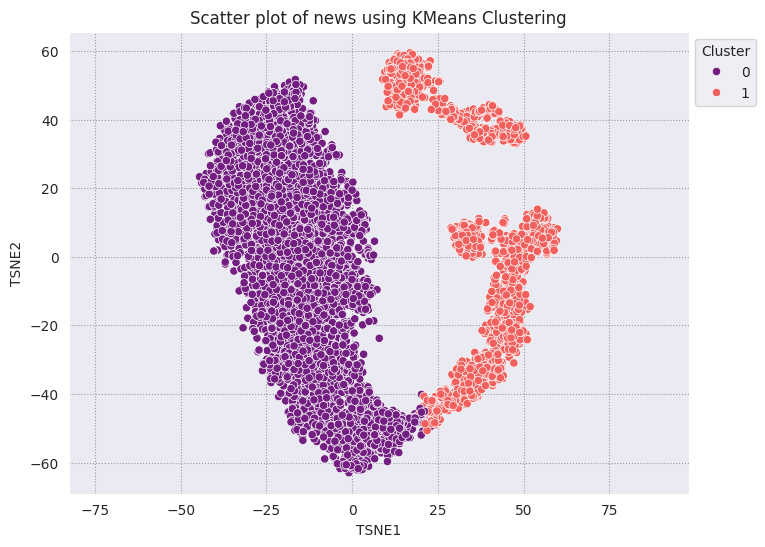

In [10]:


# Create Datasets and DataLoaders
train_dataset = preprocesser.SentencePairDataset(train_data, bert_tokenizer, codebert_tokenizer,message='commit_message',command='diff_code',label='category')
val_dataset = preprocesser.SentencePairDataset(val_data, bert_tokenizer, codebert_tokenizer,message='commit_message',command='diff_code',label='category')
test_dataset = preprocesser.SentencePairDataset(test_data, bert_tokenizer, codebert_tokenizer,message='commit_message',command='diff_code',label='category')

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)



# # Initialize the model
# model = em.CombinedModel(bert_model, codebert_model, bert_tokenizer, codebert_tokenizer)

# # Train the model
# model.trainer(train_loader, val_loader,num_epochs=10)
# for batch in train_loader:
#     print(batch)


base_model1 = moe.BaseModel(bert_model,bert_tokenizer)
base_model2 = moe.BaseModel(codebert_model,codebert_tokenizer)

# Create stacking model
moe_model = moe.MoEModel(base_model1, base_model2)
# Train the model
moe_model.trainer(train_loader, val_loader,num_epochs=10, patience=3)

In [11]:
import torch

In [12]:
test_dataset = preprocesser.SentencePairDataset(test_data, bert_tokenizer, codebert_tokenizer,message='commit_message',command='diff_code',label='category')
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [13]:
test_acc, test_labels, test_probabilities, test_embeddings, test_predictions = moe_model.evaluate(test_loader)

Validation Accuracy: 0.9190245718540581
Precision: 0.9194712468217386
Recall: 0.9190245718540581
F1-Score: 0.9192057299384142


In [14]:
res = test_data.copy()

In [15]:
res['test_labels'] = test_labels
res['test_probabilities'] = test_probabilities
res['test_embeddings'] = test_embeddings
res['test_predictions'] = test_predictions

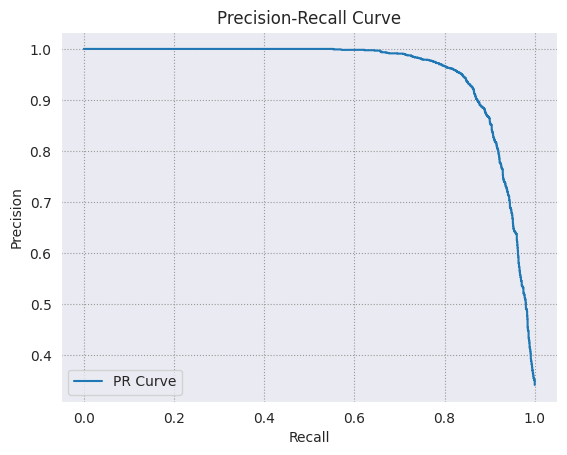

In [16]:
# PR curve
moe_model.plot_pr_curve(test_labels, test_probabilities)
# Plot t-SNE for the best model

embedding来啦 (768,)


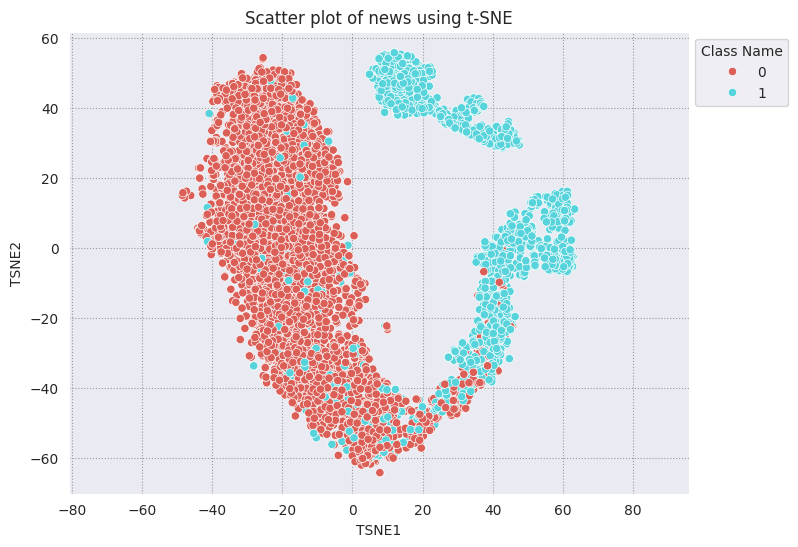

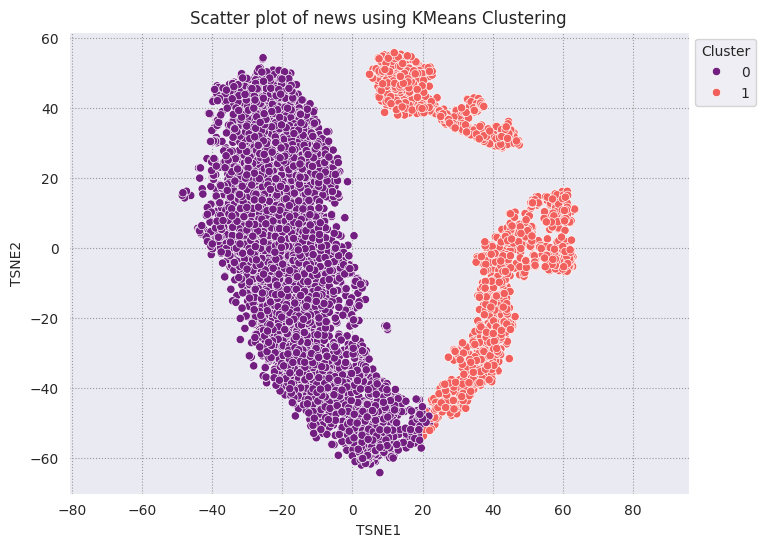

In [17]:
# cluster to show the quality of embeddings
moe_model.plot_tsne(test_embeddings, test_labels)

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix on Dataset I', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    # plt.xlabel('Predicted label')
    plt.tight_layout()

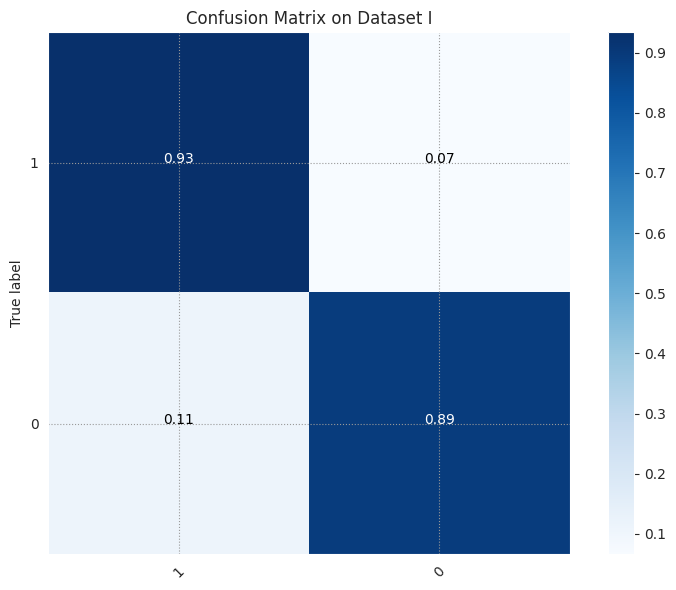

In [20]:
cm = confusion_matrix(test_labels, test_predictions)

# Call the function to plot the confusion matrix
class_names = val_data['category'].unique()  # Replace with your class names
plot_confusion_matrix(cm, classes=class_names, normalize=True)  # Set normalize=False if you want counts instead of percentages
plt.savefig('Confusion Matrix on Dataset Patch_DB')

In [ ]:
res.to_csv('moe_model_res.csv')

In [21]:
res_mis = test_data.copy()

In [70]:
test_data

,level_0,index,Unnamed: 0,CVE_ID,CWE_ID,category,commit_id,commit_message,diff_code,owner,repo,source,message,command
0,0,0,27776,NaN,NaN,1,600a507ddcb99096731e1d96a3ebf43e20fc7f80,commit 600a507ddcb99096731e1d96a3ebf43e20fc7f8...,diff --git a/drivers/net/ethernet/intel/ixgbe/...,mjg59,linux,wild,NaN,NaN
1,1,1,25795,NaN,NaN,1,2a98dbbcd72cfae508c4d90bcbdc829363554ea7,commit 2a98dbbcd72cfae508c4d90bcbdc829363554ea...,diff --git a/drivers/usb/gadget/f_ecm.c b/driv...,torvalds,linux,wild,NaN,....
2,2,2,20663,NaN,NaN,0,33bf6102210bcbd39844514033898910c24824df,commit 33bf6102210bcbd39844514033898910c24824d...,diff --git a/sys/netinet/ip_ah.c b/sys/netinet...,openbsd,src,wild,NaN,NaN
3,3,3,16926,NaN,NaN,0,cc215898396ec6dccc900eed193c8ca6a2c77894,commit cc215898396ec6dccc900eed193c8ca6a2c7789...,diff --git a/sql/item_strfunc.cc b/sql/item_st...,mysql,mysql-server,wild,NaN,NaN
4,4,4,21645,NaN,NaN,0,3cdc0ed0cea50ea08dd146c1bbc82b1bcc2e1b80,commit 3cdc0ed0cea50ea08dd146c1bbc82b1bcc2e1b8...,diff --git a/mm/slab.c b/mm/slab.c\nindex 2e71...,stoth68000,media-tree,wild,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5367,5367,5367,28506,NaN,NaN,1,1708e2eb042f3511a2a02dbf7f6fbb22afe51e2d,commit 1708e2eb042f3511a2a02dbf7f6fbb22afe51e2...,diff --git a/ui/gtk/stats_tree_stat.c b/ui/gtk...,wireshark,wireshark,wild,NaN,NaN
5368,5368,5368,32843,CVE-2013-4530,119,1,d8d0a0bc7e194300e53a346d25fe5724fd588387,From d8d0a0bc7e194300e53a346d25fe5724fd588387 ...,diff --git a/hw/ssi/pl022.c b/hw/ssi/pl022.c\n...,NaN,NaN,cve,....,NaN
5369,5369,5369,16533,NaN,NaN,0,fb522f16ee93bf7be38ab7255cb11c68d3752ad2,commit fb522f16ee93bf7be38ab7255cb11c68d3752ad...,diff --git a/ext/oci8/oci8_interface.c b/ext/o...,php,php-src,wild,....,NaN
5370,5370,5370,5157,NaN,NaN,0,1b74c25bc1a142ee8dd7ad080e2a974f28d1cb18,commit 1b74c25bc1a142ee8dd7ad080e2a974f28d1cb1...,diff --git a/fs/nfsd/nfs4state.c b/fs/nfsd/nfs...,stoth68000,media-tree,wild,NaN,NaN


In [3]:
test_data

,index,Unnamed: 0,CVE_ID,CWE_ID,category,commit_id,commit_message,diff_code,owner,repo,source
0,0,27776,NaN,NaN,1,600a507ddcb99096731e1d96a3ebf43e20fc7f80,commit 600a507ddcb99096731e1d96a3ebf43e20fc7f8...,diff --git a/drivers/net/ethernet/intel/ixgbe/...,mjg59,linux,wild
1,1,25795,NaN,NaN,1,2a98dbbcd72cfae508c4d90bcbdc829363554ea7,commit 2a98dbbcd72cfae508c4d90bcbdc829363554ea...,diff --git a/drivers/usb/gadget/f_ecm.c b/driv...,torvalds,linux,wild
2,2,20663,NaN,NaN,0,33bf6102210bcbd39844514033898910c24824df,commit 33bf6102210bcbd39844514033898910c24824d...,diff --git a/sys/netinet/ip_ah.c b/sys/netinet...,openbsd,src,wild
3,3,16926,NaN,NaN,0,cc215898396ec6dccc900eed193c8ca6a2c77894,commit cc215898396ec6dccc900eed193c8ca6a2c7789...,diff --git a/sql/item_strfunc.cc b/sql/item_st...,mysql,mysql-server,wild
4,4,21645,NaN,NaN,0,3cdc0ed0cea50ea08dd146c1bbc82b1bcc2e1b80,commit 3cdc0ed0cea50ea08dd146c1bbc82b1bcc2e1b8...,diff --git a/mm/slab.c b/mm/slab.c\nindex 2e71...,stoth68000,media-tree,wild
...,...,...,...,...,...,...,...,...,...,...,...
5367,5367,28506,NaN,NaN,1,1708e2eb042f3511a2a02dbf7f6fbb22afe51e2d,commit 1708e2eb042f3511a2a02dbf7f6fbb22afe51e2...,diff --git a/ui/gtk/stats_tree_stat.c b/ui/gtk...,wireshark,wireshark,wild
5368,5368,32843,CVE-2013-4530,119,1,d8d0a0bc7e194300e53a346d25fe5724fd588387,From d8d0a0bc7e194300e53a346d25fe5724fd588387 ...,diff --git a/hw/ssi/pl022.c b/hw/ssi/pl022.c\n...,NaN,NaN,cve
5369,5369,16533,NaN,NaN,0,fb522f16ee93bf7be38ab7255cb11c68d3752ad2,commit fb522f16ee93bf7be38ab7255cb11c68d3752ad...,diff --git a/ext/oci8/oci8_interface.c b/ext/o...,php,php-src,wild
5370,5370,5157,NaN,NaN,0,1b74c25bc1a142ee8dd7ad080e2a974f28d1cb18,commit 1b74c25bc1a142ee8dd7ad080e2a974f28d1cb1...,diff --git a/fs/nfsd/nfs4state.c b/fs/nfsd/nfs...,stoth68000,media-tree,wild


In [71]:
# 设置数据缺失的情况
# 设置随机种子以便结果可重复
import numpy as np
def data_missing(df):
    
    np.random.seed(42)
    
    # 定义缺失值的比例
    missing_rate = 0.2
    
    # 计算每列需要创建缺失值的数量
    num_missing = int(missing_rate * len(df))
    
    # 随机选择行进行缺失
    for col in ['commit_message', 'diff_code']:
        missing_indices = np.random.choice(df.index, num_missing, replace=False)
        
        # 选择每个单元格的部分字符来替换，而不是全部替换成NaN
        for idx in missing_indices:
            if np.random.rand() > 0.5:
                # 保留前半部分
                try:
                    # print(df.loc[idx, col][:len(df.loc[idx, col])//2] + '...')
                    df.loc[idx, col] = df.loc[idx, col][:len(df.loc[idx, col])//2] + '...'
                except:
                    continue
            else:
                # 保留后半部分
                try:
                    # print('...' + df.loc[idx, col][len(df.loc[idx, col])//2:])
                    df.loc[idx, col] = '...' + df.loc[idx, col][len(df.loc[idx, col])//2:]
                except:
                    continue
    
    return df
test_data_miss = data_missing(test_data)

In [72]:
test_data_miss

,level_0,index,Unnamed: 0,CVE_ID,CWE_ID,category,commit_id,commit_message,diff_code,owner,repo,source,message,command
0,0,0,27776,NaN,NaN,1,600a507ddcb99096731e1d96a3ebf43e20fc7f80,commit 600a507ddcb99096731e1d96a3ebf43e20fc7f8...,diff --git a/drivers/net/ethernet/intel/ixgbe/...,mjg59,linux,wild,NaN,NaN
1,1,1,25795,NaN,NaN,1,2a98dbbcd72cfae508c4d90bcbdc829363554ea7,commit 2a98dbbcd72cfae508c4d90bcbdc829363554ea...,diff --git a/drivers/usb/gadget/f_ecm.c b/driv...,torvalds,linux,wild,NaN,....
2,2,2,20663,NaN,NaN,0,33bf6102210bcbd39844514033898910c24824df,commit 33bf6102210bcbd39844514033898910c24824d...,diff --git a/sys/netinet/ip_ah.c b/sys/netinet...,openbsd,src,wild,NaN,NaN
3,3,3,16926,NaN,NaN,0,cc215898396ec6dccc900eed193c8ca6a2c77894,commit cc215898396ec6dccc900eed193c8ca6a2c7789...,diff --git a/sql/item_strfunc.cc b/sql/item_st...,mysql,mysql-server,wild,NaN,NaN
4,4,4,21645,NaN,NaN,0,3cdc0ed0cea50ea08dd146c1bbc82b1bcc2e1b80,commit 3cdc0ed0cea50ea08dd146c1bbc82b1bcc2e1b8...,diff --git a/mm/slab.c b/mm/slab.c\nindex 2e71...,stoth68000,media-tree,wild,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5367,5367,5367,28506,NaN,NaN,1,1708e2eb042f3511a2a02dbf7f6fbb22afe51e2d,...ps://bugs.debian.org/cgi-bin/bugreport.cgi?...,diff --git a/ui/gtk/stats_tree_stat.c b/ui/gtk...,wireshark,wireshark,wild,NaN,NaN
5368,5368,5368,32843,CVE-2013-4530,119,1,d8d0a0bc7e194300e53a346d25fe5724fd588387,From d8d0a0bc7e194300e53a346d25fe5724fd588387 ...,diff --git a/hw/ssi/pl022.c b/hw/ssi/pl022.c\n...,NaN,NaN,cve,....,NaN
5369,5369,5369,16533,NaN,NaN,0,fb522f16ee93bf7be38ab7255cb11c68d3752ad2,commit fb522f16ee93bf7be38ab7255cb11c68d3752ad...,diff --git a/ext/oci8/oci8_interface.c b/ext/o...,php,php-src,wild,....,NaN
5370,5370,5370,5157,NaN,NaN,0,1b74c25bc1a142ee8dd7ad080e2a974f28d1cb18,commit 1b74c25bc1a142ee8dd7ad080e2a974f28d1cb1...,diff --git a/fs/nfsd/nfs4state.c b/fs/nfsd/nfs...,stoth68000,media-tree,wild,NaN,NaN


In [83]:
test_data_miss['commit_message']

0       commit 600a507ddcb99096731e1d96a3ebf43e20fc7f8...
1       commit 2a98dbbcd72cfae508c4d90bcbdc829363554ea...
2       commit 33bf6102210bcbd39844514033898910c24824d...
3       commit cc215898396ec6dccc900eed193c8ca6a2c7789...
4       commit 3cdc0ed0cea50ea08dd146c1bbc82b1bcc2e1b8...
                              ...                        
5367    ...ps://bugs.debian.org/cgi-bin/bugreport.cgi?...
5368    From d8d0a0bc7e194300e53a346d25fe5724fd588387 ...
5369    commit fb522f16ee93bf7be38ab7255cb11c68d3752ad...
5370    commit 1b74c25bc1a142ee8dd7ad080e2a974f28d1cb1...
5371    commit d16b4b3e485526b39e7bdc36bf2d8041080a720...
Name: commit_message, Length: 5372, dtype: object

In [84]:
test_data_miss[test_data_miss['commit_message'].str.contains('...')]

,level_0,index,Unnamed: 0,CVE_ID,CWE_ID,category,commit_id,commit_message,diff_code,owner,repo,source,message,command
0,0,0,27776,NaN,NaN,1,600a507ddcb99096731e1d96a3ebf43e20fc7f80,commit 600a507ddcb99096731e1d96a3ebf43e20fc7f8...,diff --git a/drivers/net/ethernet/intel/ixgbe/...,mjg59,linux,wild,NaN,NaN
1,1,1,25795,NaN,NaN,1,2a98dbbcd72cfae508c4d90bcbdc829363554ea7,commit 2a98dbbcd72cfae508c4d90bcbdc829363554ea...,diff --git a/drivers/usb/gadget/f_ecm.c b/driv...,torvalds,linux,wild,NaN,....
2,2,2,20663,NaN,NaN,0,33bf6102210bcbd39844514033898910c24824df,commit 33bf6102210bcbd39844514033898910c24824d...,diff --git a/sys/netinet/ip_ah.c b/sys/netinet...,openbsd,src,wild,NaN,NaN
3,3,3,16926,NaN,NaN,0,cc215898396ec6dccc900eed193c8ca6a2c77894,commit cc215898396ec6dccc900eed193c8ca6a2c7789...,diff --git a/sql/item_strfunc.cc b/sql/item_st...,mysql,mysql-server,wild,NaN,NaN
4,4,4,21645,NaN,NaN,0,3cdc0ed0cea50ea08dd146c1bbc82b1bcc2e1b80,commit 3cdc0ed0cea50ea08dd146c1bbc82b1bcc2e1b8...,diff --git a/mm/slab.c b/mm/slab.c\nindex 2e71...,stoth68000,media-tree,wild,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5367,5367,5367,28506,NaN,NaN,1,1708e2eb042f3511a2a02dbf7f6fbb22afe51e2d,...ps://bugs.debian.org/cgi-bin/bugreport.cgi?...,diff --git a/ui/gtk/stats_tree_stat.c b/ui/gtk...,wireshark,wireshark,wild,NaN,NaN
5368,5368,5368,32843,CVE-2013-4530,119,1,d8d0a0bc7e194300e53a346d25fe5724fd588387,From d8d0a0bc7e194300e53a346d25fe5724fd588387 ...,diff --git a/hw/ssi/pl022.c b/hw/ssi/pl022.c\n...,NaN,NaN,cve,....,NaN
5369,5369,5369,16533,NaN,NaN,0,fb522f16ee93bf7be38ab7255cb11c68d3752ad2,commit fb522f16ee93bf7be38ab7255cb11c68d3752ad...,diff --git a/ext/oci8/oci8_interface.c b/ext/o...,php,php-src,wild,....,NaN
5370,5370,5370,5157,NaN,NaN,0,1b74c25bc1a142ee8dd7ad080e2a974f28d1cb18,commit 1b74c25bc1a142ee8dd7ad080e2a974f28d1cb1...,diff --git a/fs/nfsd/nfs4state.c b/fs/nfsd/nfs...,stoth68000,media-tree,wild,NaN,NaN


In [75]:
# test_data_miss.reset_index(inplace=True)
test_miss_dataset = preprocesser.SentencePairDataset(test_data_miss, bert_tokenizer, codebert_tokenizer,message='commit_message',command='diff_code',label='category')
test_miss_loader = DataLoader(test_miss_dataset, batch_size=8, shuffle=False)
test_miss_loader

In [76]:
test_miss_acc, test_miss_labels, test_miss_probabilities, test_miss_embeddings, test_miss_predictions = moe_model.evaluate(test_miss_loader)

Validation Accuracy: 0.9028294862248697
Precision: 0.9023026538315995
Recall: 0.9028294862248697
F1-Score: 0.9024582385702318


In [77]:
res_mis['test_miss_labels'] = test_miss_labels
res_mis['test_miss_probabilities'] = test_miss_probabilities
res_mis['test_miss_embeddings'] = test_miss_embeddings
res_mis['test_miss_predictions'] = test_miss_predictions

In [78]:
res_mis.to_csv('moe_model_res_data_missing.csv')